In [ ]:
%%bash
conda install -c conda-forge pydub

conda install ffmpeg

conda install -c conda-forge python-sounddevice

conda install -c conda-forge librosa

In [236]:
print(librosa.__version__)
print(sd.__version__)

0.8.0
0.4.1


<ipython-input-13-9a4383dd4c35>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram


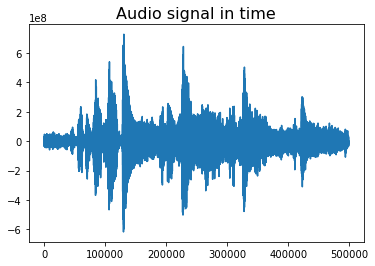

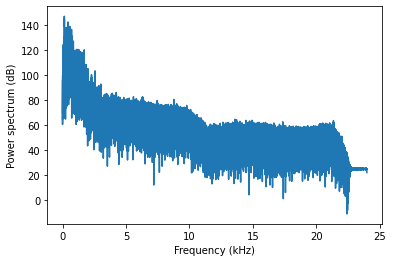

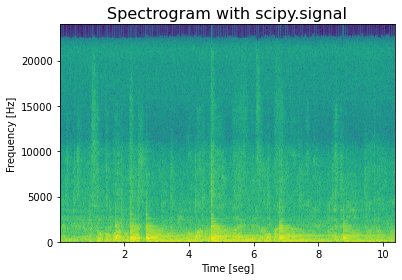

In [13]:
# %load tuning.py
# from scipy.io import wavfile # scipy library to read wav files
import numpy as np
from pydub import AudioSegment

AudioName = "la.m4a" # Audio File
# fs, Audiodata = wavfile.read(AudioName)
sound = AudioSegment.from_file(AudioName)
fs = sound.frame_rate
# channel_sounds = sound.split_to_mono()
#Audiodata = [s.get_array_of_samples() for s in channel_sounds]
Audiodata = np.array(sound.get_array_of_samples() )

# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(Audiodata )
plt.title('Audio signal in time',size=16)

# spectrum
from scipy.fftpack import fft # fourier transform
n = len(Audiodata ) 
AudioFreq = fft(Audiodata )
AudioFreq = AudioFreq[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(AudioFreq) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2
if n % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

plt.figure()
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq)) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');


#Spectrogram
from scipy import signal
N = 512 #Number of point in the fft
f, t, Sxx = signal.spectrogram(Audiodata , fs,window = signal.blackman(N),nfft=N)
plt.figure()
plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
#plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [seg]')
plt.title('Spectrogram with scipy.signal',size=16);

plt.show()


In [30]:
import librosa
y, sr = librosa.load('output.wav')

y_harm = librosa.effects.harmonic(y)

tuning = librosa.estimate_tuning(y=y_harm, sr=sr)

print('{:+0.2f} cents'.format(100 * tuning))

-14.00 cents


In [63]:
AudioSegment.from_file('output.wav')

In [118]:
# %load tuning_recorded.py
import sounddevice as sd
from scipy.io.wavfile import write
import librosa

fs = 44100 #Sample rate
seconds = 4 #duration of recording

print('start recording')
myrecording = sd.rec(int(seconds*fs), samplerate=fs, channels=1)
sd.wait() #wait until recording is finished
print('finished recording')
write('output.wav', fs, myrecording) #save as wav file
y, sr =librosa.load('output.wav')
librosa.yin(y, fmin=310, fmax=400)

start recording
finished recording


array([350.57621183, 346.22645624, 342.32714557, 306.25      ,
       306.25      , 306.25      , 306.25      , 306.25      ,
       306.25      , 306.25      , 306.25      , 306.25      ,
       306.25      , 306.25      , 306.25      , 306.25      ,
       306.25      , 306.25      , 306.25      , 306.25      ,
       306.25      , 306.25      , 306.25      , 400.90909091,
       400.90909091, 400.90909091, 400.90909091, 400.90909091,
       400.90909091, 400.90909091, 400.90909091, 306.25      ,
       306.25      , 306.25      , 306.25      , 306.25      ,
       306.25      , 306.25      , 306.25      , 306.25      ,
       306.25      , 306.25      , 306.25      , 367.72583779,
       353.9865602 , 339.96190718, 306.25      , 306.25      ,
       306.25      , 306.25      , 306.25      , 306.25      ,
       306.25      , 306.25      , 306.25      , 311.33077031,
       353.55165557, 352.46439823, 351.73335318, 351.64095946,
       351.73419357, 351.58717697, 351.51067585, 351.71

In [119]:
AudioSegment.from_file('output.wav')

start recording
finished recording


/Users/anacon/miniconda3/envs/pythonenv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/anacon/miniconda3/envs/pythonenv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/anacon/miniconda3/envs/pythonenv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


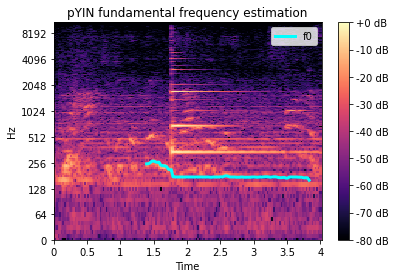

In [128]:
# %load fundamentalfrequencyF0_YIN.py
import sounddevice as sd
from scipy.io.wavfile import write
import librosa
import librosa.display
import numpy as np

fs = 44100 #Sample rate
seconds = 4 #duration of recording

print('start recording')
myrecording = sd.rec(int(seconds*fs), samplerate=fs, channels=1)
sd.wait() #wait until recording is finished
print('finished recording')
write('output.wav', fs, myrecording) #save as wav file
y, sr =librosa.load('output.wav')
f0, voiced_flag, voiced_probs = librosa.pyin(y, 
                    fmin=librosa.note_to_hz('E2'), fmax=librosa.note_to_hz('E4'))
times = librosa.times_like(f0)
import matplotlib.pyplot as plt
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [129]:
f0

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
       249.8109744 , 251.25811465, 254.17759331, 264.66

start recording
finished recording


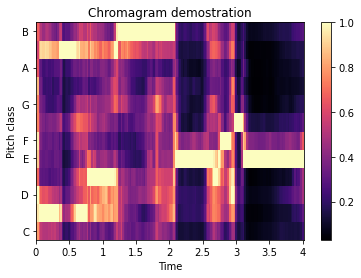

In [208]:
# %load tuning_chroma.py
import sounddevice as sd
from scipy.io.wavfile import write
import librosa
fs = 44100 #Sample rate
seconds = 4 #duration of recording
print('start recording')
myrecording = sd.rec(int(seconds*fs), samplerate=fs, channels=1)
sd.wait() #wait until recording is finished
print('finished recording')
write('output.wav', fs, myrecording) #save as wav file
y, sr =librosa.load('output.wav')
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time',ax=ax)
ax.set(title='Chromagram demostration')
fig.colorbar(img, ax=ax)

In [ ]:
AudioSegment.from_file('output.wav')

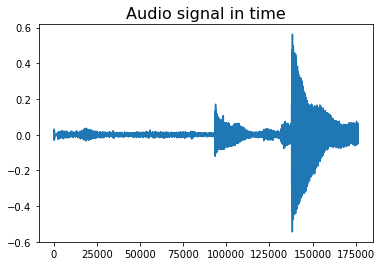

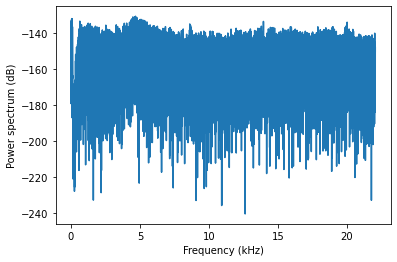

In [220]:
# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(myrecording )
plt.title('Audio signal in time',size=16)

# spectrum
from scipy.fftpack import fft # fourier transform
n = len(myrecording ) 
AudioFreq = fft(myrecording )
AudioFreq = AudioFreq[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(AudioFreq) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2
if n % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

plt.figure()
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq)) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');

#Spectrogram
from scipy import signal
#N = 256 #Number of point in the fft
#f, t, Sxx = signal.spectrogram(myrecording,fs,window=signal.windows.blackman(N),nfft=N)
#plt.figure()
#plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
#plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [seg]')
#plt.title('Spectrogram with scipy.signal',size=16);
#plt.show()